#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 10
**CH10A Understanding the gender difference in earnings**

using the cps-earnings dataset

version 1.0 2021-05-05

In [1]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *
from datetime import datetime
from scipy.stats import norm
import statsmodels.api as sm
import statsmodels.formula.api as smf
from mizani import transforms
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

warnings.filterwarnings("ignore")


In [26]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders
data_in = dirname + "da_data_repo/cps-earnings/clean/"
data_out = dirname + "da_case_studies/ch10-gender-earnings-understand/"
output = dirname + "da_case_studies/ch10-gender-earnings-understand/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)


In [27]:
cps = pd.read_csv("/workspaces/codespaces-jupyter/data/morg-2014-emp.csv") 
#cps= pd.read_csv("https://osf.io/download/4ay9x/")


In [28]:
cps.head().T

,0,1,2,3,4
Unnamed: 0,3,5,6,10,11
hhid,2600310997690,75680310997590,75680310997590,179140131100930,179140131100930
intmonth,January,January,January,January,January
stfips,AL,AL,AL,AL,AL
weight,3151.6801,3457.1138,3936.911,3288.364,3422.85
earnwke,1692.0,450.0,1090.0,769.23,826.92
uhours,40,40,60,40,40
grade92,43,41,41,40,43
race,1,2,2,1,1
ethnic,NaN,NaN,NaN,NaN,NaN


In [38]:
cps = cps.query("uhours>=20 & earnwke>0 & age>=24 & age<=64 & grade92>=44 & occ2012==2310") 
cps

,Unnamed: 0,hhid,intmonth,stfips,weight,earnwke,uhours,grade92,race,ethnic,...,ownchild,chldpres,prcitshp,state,ind02,occ2012,class,unionmme,unioncov,lfsr94
21,43,954001919079770,January,AL,2847.5801,826.92,40,44,1,NaN,...,0,0,"Native, Born In US",63,Elementary and secondary schools (6111),2310,"Private, For Profit",No,No,Employed-At Work
84,199,678011962039080,January,AL,2424.1925,1000.00,56,44,2,NaN,...,0,0,"Native, Born In US",63,Elementary and secondary schools (6111),2310,"Private, For Profit",Yes,NaN,Employed-At Work
171,401,20902093001906,January,AK,429.0975,1000.00,40,44,1,NaN,...,0,0,"Native, Born In US",94,Elementary and secondary schools (6111),2310,Government - State,Yes,NaN,Employed-At Work
358,784,140603073808694,January,AZ,4664.7207,1057.69,40,44,1,NaN,...,0,0,"Native, Born In US",86,Elementary and secondary schools (6111),2310,Government - Local,No,No,Employed-At Work
492,1097,985989670786005,January,AR,1876.4358,1288.46,40,44,1,NaN,...,0,0,"Native, Born In US",71,Elementary and secondary schools (6111),2310,Government - State,No,No,Employed-At Work
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148497,315292,406906295993931,December,VA,2672.9009,163.00,50,44,1,4.0,...,0,0,"Foreign Born, US Cit By Naturalization",5,Elementary and secondary schools (6111),2310,"Private, For Profit",No,Yes,Employed-At Work
148690,315704,50310142195518,December,WA,2599.8816,1176.92,37,44,1,NaN,...,0,0,"Native, Born In US",9,Elementary and secondary schools (6111),2310,Government - Local,Yes,NaN,Employed-At Work
149028,316503,710004675904205,December,WI,3418.8518,1450.00,60,44,1,NaN,...,0,0,"Native, Born In US",3,Elementary and secondary schools (6111),2310,Government - State,No,No,Employed-At Work
149258,316926,765341100004306,December,WY,247.9801,1550.00,40,44,1,NaN,...,0,0,"Native, Born In US",8,Elementary and secondary schools (6111),2310,Government - Local,No,No,Employed-At Work


In [39]:
cps["grade92"].value_counts()

grade92
44    1672
45      47
46      37
Name: count, dtype: int64

In [40]:
# CREATE VARIABLES
cps["female"] = (cps.sex == 2).astype(int)
cps["w"] = cps["earnwke"] / cps["uhours"]
cps["lnw"] = np.log(cps["w"])
## Write out to csv
cps.to_csv("earnings_multireg.csv")

In [46]:
cps["female"].value_counts()

female
1    1424
0     332
Name: count, dtype: int64

In [41]:
#####################
# DISTRIBUTION OF EARNINGS
#######################
cps.loc[:, ["earnwke", "uhours", "w"]].describe()

,earnwke,uhours,w
count,1756.000000,1756.000000,1756.000000
mean,1176.302044,42.098519,28.285090
std,500.111168,7.301795,12.160255
min,2.000000,20.000000,0.050000
25%,865.000000,40.000000,20.000000
50%,1093.000000,40.000000,25.750000
75%,1402.250000,45.000000,33.897045
max,2884.610000,80.000000,72.115250


In [47]:
cps[cps['w'] >= 1]

,Unnamed: 0,hhid,intmonth,stfips,weight,earnwke,uhours,grade92,race,ethnic,...,state,ind02,occ2012,class,unionmme,unioncov,lfsr94,female,w,lnw
21,43,954001919079770,January,AL,2847.5801,826.92,40,44,1,NaN,...,63,Elementary and secondary schools (6111),2310,"Private, For Profit",No,No,Employed-At Work,1,20.673000,3.028829
84,199,678011962039080,January,AL,2424.1925,1000.00,56,44,2,NaN,...,63,Elementary and secondary schools (6111),2310,"Private, For Profit",Yes,NaN,Employed-At Work,1,17.857143,2.882404
171,401,20902093001906,January,AK,429.0975,1000.00,40,44,1,NaN,...,94,Elementary and secondary schools (6111),2310,Government - State,Yes,NaN,Employed-At Work,1,25.000000,3.218876
358,784,140603073808694,January,AZ,4664.7207,1057.69,40,44,1,NaN,...,86,Elementary and secondary schools (6111),2310,Government - Local,No,No,Employed-At Work,1,26.442250,3.274963
492,1097,985989670786005,January,AR,1876.4358,1288.46,40,44,1,NaN,...,71,Elementary and secondary schools (6111),2310,Government - State,No,No,Employed-At Work,0,32.211500,3.472324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148497,315292,406906295993931,December,VA,2672.9009,163.00,50,44,1,4.0,...,5,Elementary and secondary schools (6111),2310,"Private, For Profit",No,Yes,Employed-At Work,1,3.260000,1.181727
148690,315704,50310142195518,December,WA,2599.8816,1176.92,37,44,1,NaN,...,9,Elementary and secondary schools (6111),2310,Government - Local,Yes,NaN,Employed-At Work,1,31.808649,3.459738
149028,316503,710004675904205,December,WI,3418.8518,1450.00,60,44,1,NaN,...,3,Elementary and secondary schools (6111),2310,Government - State,No,No,Employed-At Work,1,24.166667,3.184974
149258,316926,765341100004306,December,WY,247.9801,1550.00,40,44,1,NaN,...,8,Elementary and secondary schools (6111),2310,Government - Local,No,No,Employed-At Work,1,38.750000,3.657131


In [45]:
cps[cps['w'] < 1]

,Unnamed: 0,hhid,intmonth,stfips,weight,earnwke,uhours,grade92,race,ethnic,...,state,ind02,occ2012,class,unionmme,unioncov,lfsr94,female,w,lnw
137837,292665,710007400444756,December,CA,3283.3742,2.0,40,44,1,NaN,...,9,Elementary and secondary schools (6111),2310,"Private, Nonprofit",Yes,NaN,Employed-At Work,1,0.05,-2.995732


In [48]:
cps.loc[cps.w >= 1, ["earnwke", "uhours", "w"]].describe()

,earnwke,uhours,w
count,1755.000000,1755.000000,1755.000000
mean,1176.971162,42.099715,28.301178
std,499.466848,7.303704,12.145013
min,38.460000,20.000000,1.602500
25%,865.000000,40.000000,20.000000
50%,1095.000000,40.000000,25.750000
75%,1402.500000,45.000000,33.921364
max,2884.610000,80.000000,72.115250


In [53]:
cps.loc[cps.female == 1, ["age"]].describe()

,age
count,1424.000000
mean,43.561798
std,10.180402
min,24.000000
25%,35.000000
50%,43.000000
75%,52.000000
max,64.000000


In [49]:
cps[cps['female']==1].count()

Unnamed: 0    1424
hhid          1424
intmonth      1424
stfips        1424
weight        1424
earnwke       1424
uhours        1424
grade92       1424
race          1424
ethnic          87
age           1424
sex           1424
marital       1424
ownchild      1424
chldpres      1424
prcitshp      1424
state         1424
ind02         1424
occ2012       1424
class         1424
unionmme      1424
unioncov       539
lfsr94        1424
female        1424
w             1424
lnw           1424
dtype: int64

### Table 10.1 Gender differences in earnings – log earnings and gender

In [50]:
# use robust std
reg = smf.ols(formula="lnw~female", data=cps).fit(cov_type="HC1")
reg2 = smf.ols(formula="lnw~female+age", data=cps).fit(cov_type="HC1")
reg3 = smf.ols(formula="age~female", data=cps).fit(cov_type="HC1")

In [51]:
stargazer = Stargazer([reg, reg2, reg3])
stargazer.custom_columns(["ln wage", "ln wage", "age"], [1, 1, 1])
stargazer.covariate_order(["female", "age", "Intercept"])
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer

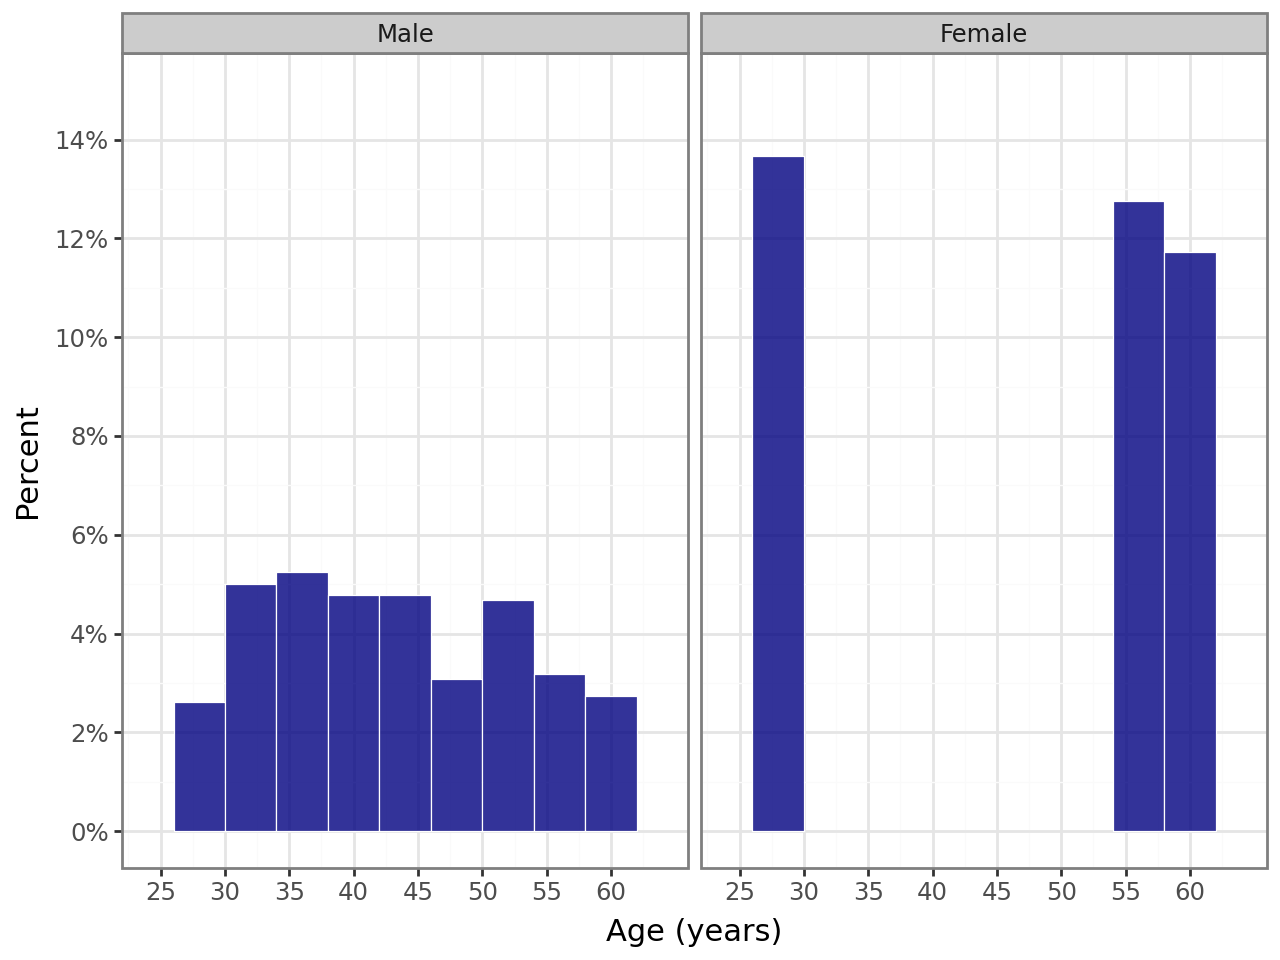

In [52]:
(
    ggplot(cps, aes(x="age", y="2*stat(count)/sum(stat(count))"))
    + geom_histogram(
        binwidth=4,
        color="white",
        fill="navy",
        size=0.25,
        alpha=0.8,
        show_legend=False,
        na_rm=True,
    )
    + labs(x="Age (years)", y="Percent")
    + facet_wrap("~female", labeller={"0": "Male", "1": "Female"})
    + labs(x="Age (years)", y="Percent")
    + scale_x_continuous(
        limits=(24, 64),
        breaks=np.arange(25, 65, 5),
    )
    + scale_y_continuous(
        limits=(0, 0.15), breaks=np.arange(0, 0.15, 0.02), labels=percent_format()
    )
    + theme_bw()
)


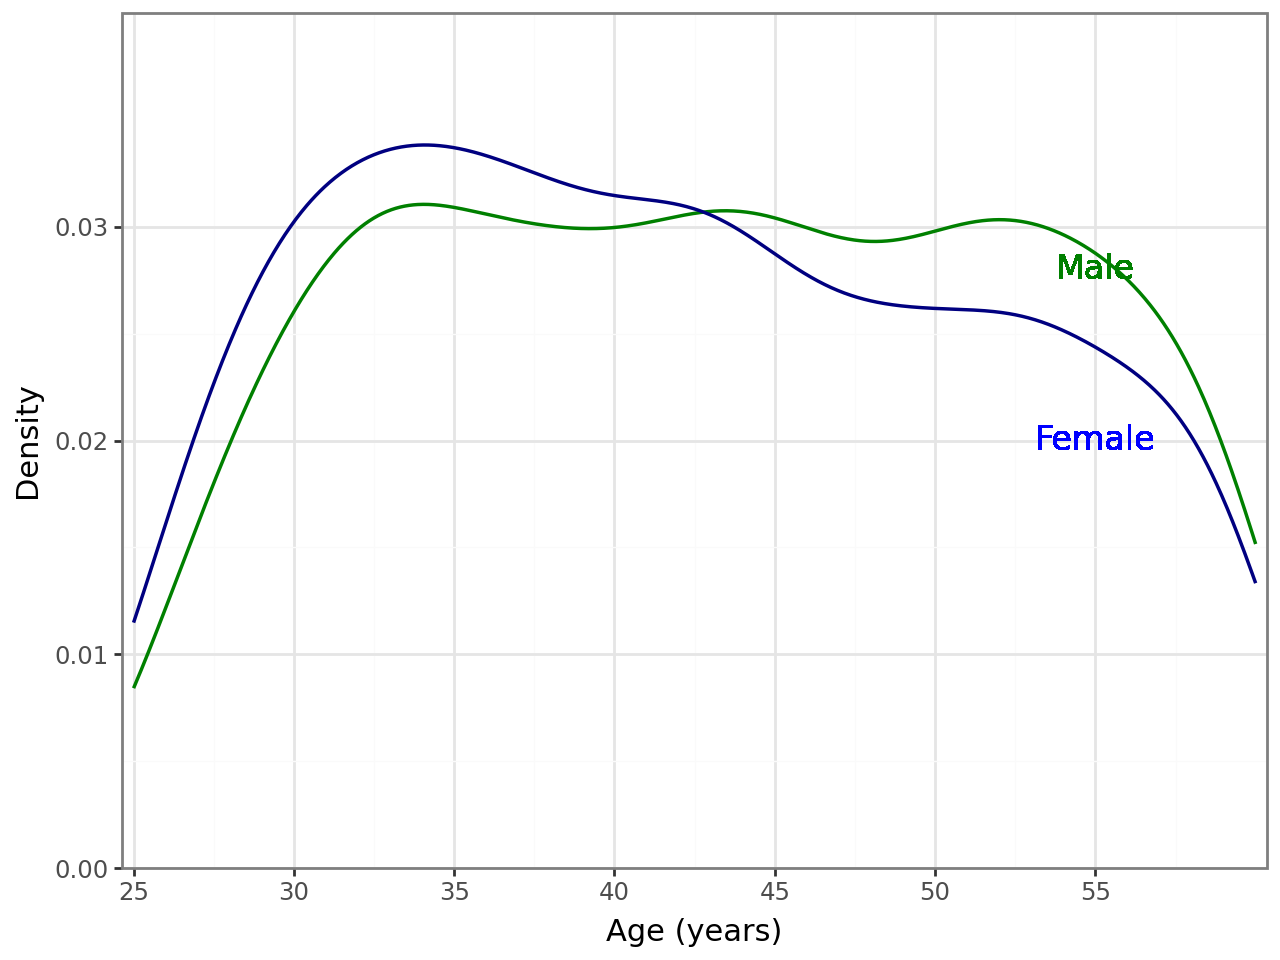

In [11]:
(
    ggplot(cps, aes(x="age", y="stat(density)", color="factor(female)"))
    + geom_density(adjust=1.5, show_legend=False, na_rm=True, size=0.7)
    + labs(x="Age (years)", y="Density", color="")
    + scale_color_manual(
        name="", values=("green", "navy"), labels=("Male", "Female")
    )
    + scale_x_continuous(expand=(0.01, 0.01), limits=(25, 60), breaks=np.arange(25, 60,5))
    + scale_y_continuous(
        expand=(0.0, 0.0), limits=(0, 0.04), breaks=np.arange(0, 0.04,0.01)
    )
    + geom_text(aes(x=55, y=0.028, label="'Male'"), color="green", size=12)
    + geom_text(aes(x=55, y=0.020, label="'Female'"), color="blue", size=12)
    + theme_bw()
)


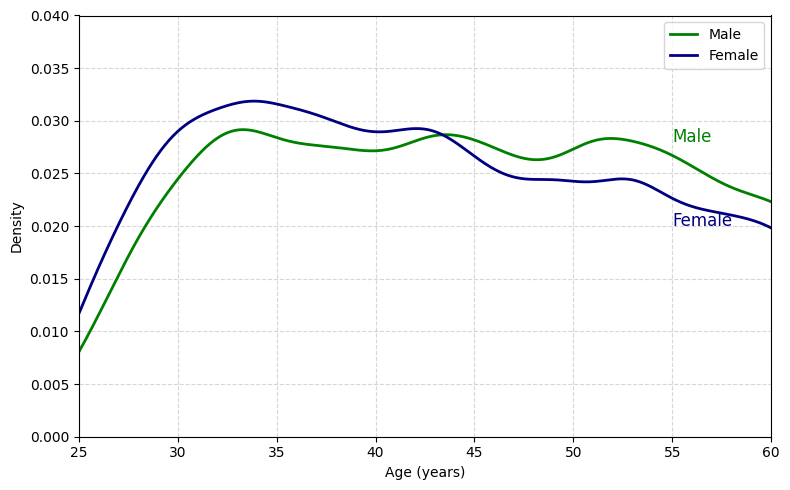

In [12]:
import numpy as np
from scipy.stats import gaussian_kde

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
for gender, color, label in zip([0, 1], ['green', 'navy'], ['Male', 'Female']):
    subset = cps[cps['female'] == gender]['age'].dropna()
    density = np.histogram(subset, bins=100, density=True)
    kde = gaussian_kde(subset, bw_method=1.5/np.std(subset, ddof=1))
    x = np.linspace(25, 60, 500)
    plt.plot(x, kde(x), color=color, label=label, linewidth=2)

plt.xlim(25, 60)
plt.ylim(0, 0.04)
plt.xlabel("Age (years)")
plt.ylabel("Density")
plt.text(55, 0.028, "Male", color="green", fontsize=12)
plt.text(55, 0.020, "Female", color="navy", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Table 10.2 Gender differences in earnings – log earnings and age, various functional forms

In [13]:
cps["agesq"] = np.power(cps["age"], 2)
cps["agecu"] = np.power(cps["age"], 3)
cps["agequ"] = np.power(cps["age"], 4)

In [14]:
reg4 = smf.ols(formula="lnw~female", data=cps).fit(cov_type="HC1")
reg5 = smf.ols(formula="lnw~female+age", data=cps).fit(cov_type="HC1")
reg6 = smf.ols(formula="lnw~female+age+agesq", data=cps).fit(cov_type="HC1")
reg7 = smf.ols(formula="lnw~female+age+agesq+agecu+agequ", data=cps).fit(cov_type="HC1")

In [15]:
stargazer = Stargazer([reg4, reg5, reg6, reg7])
stargazer.covariate_order(["female", "age", "agesq", "agecu", "agequ", "Intercept"])
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer

### Table 10.3 Gender differences in earnings – log earnings, gender and education

In [16]:
cps["ed_MA"] = (cps["grade92"] == 44).astype(int)
cps["ed_Profess"] = (cps["grade92"] == 45).astype(int)
cps["ed_Phd"] = (cps["grade92"] == 46).astype(int)

In [17]:
reg8 = smf.ols(formula="lnw~female", data=cps).fit(cov_type="HC1")
reg9 = smf.ols(formula="lnw~female + ed_Profess + ed_Phd", data=cps).fit(cov_type="HC1")
reg10 = smf.ols(formula="lnw~female + ed_Profess + ed_MA", data=cps).fit(cov_type="HC1")

In [18]:
stargazer = Stargazer([reg8, reg9, reg10])
stargazer.covariate_order(["female", "ed_Profess", "ed_Phd", "ed_MA", "Intercept"])
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer

### Table 10.4 Gender differences in earnings – log earnings, gender, age, and their interaction

In [19]:
reg11 = smf.ols(formula="lnw~age", data=cps.query("female==1")).fit(cov_type="HC1") #female
reg12 = smf.ols(formula="lnw~age", data=cps.query("female==0")).fit(cov_type="HC1") #male
reg13 = smf.ols(formula="lnw~female+age+age*female", data=cps).fit(cov_type="HC1")  #all

In [20]:
stargazer = Stargazer([reg11, reg12, reg13])
stargazer.covariate_order(["female", "age", "age:female", "Intercept"])
stargazer.rename_covariates({"Intercept": "Constant", "age:female": "female x age"})
stargazer.custom_columns(["Women", "Men", "All"], [1, 1, 1])
stargazer

### Figure 10.2 Earning differences by gender as function of age
FOR RPEDICTIONL FUNCTIONAL FORMS & INTERACTIONS WITH GENDER

In [21]:
reg14 = smf.ols(formula="lnw~age+agesq+agecu+agequ", data=cps.query("female==1")).fit(
    cov_type="HC1"
)
reg15 = smf.ols(formula="lnw~age+agesq+agecu+agequ", data=cps.query("female==0")).fit(
    cov_type="HC1"
)
reg16 = smf.ols(
    formula="lnw ~ age + agesq + agecu + agequ + female + female*age + female*agesq + female*agecu + female*agequ",
    data=cps,
).fit(cov_type="HC1")


In [22]:
Stargazer([reg14, reg15, reg16])

In [23]:
# PREDICTION AND GRAPH LINEAR
data_m = cps.query("female==0")

pred = reg13.predict(data_m)

pred = reg13.get_prediction(data_m).summary_frame()[["mean", "mean_se"]]
pred.columns = ["fit", "fit_se"]

data_m = data_m.reset_index(drop=True).join(pred)

data_m["CIup"] = data_m["fit"] + 2 * data_m["fit_se"]
data_m["CIlo"] = data_m["fit"] - 2 * data_m["fit_se"]

In [24]:
data_f = cps.query("female==1")

pred = reg13.predict(data_f)

pred = reg13.get_prediction(data_f).summary_frame()[["mean", "mean_se"]]
pred.columns = ["fit", "fit_se"]

data_f = data_f.reset_index(drop=True).join(pred)

data_f["CIup"] = data_f["fit"] + 2 * data_f["fit_se"]
data_f["CIlo"] = data_f["fit"] - 2 * data_f["fit_se"]

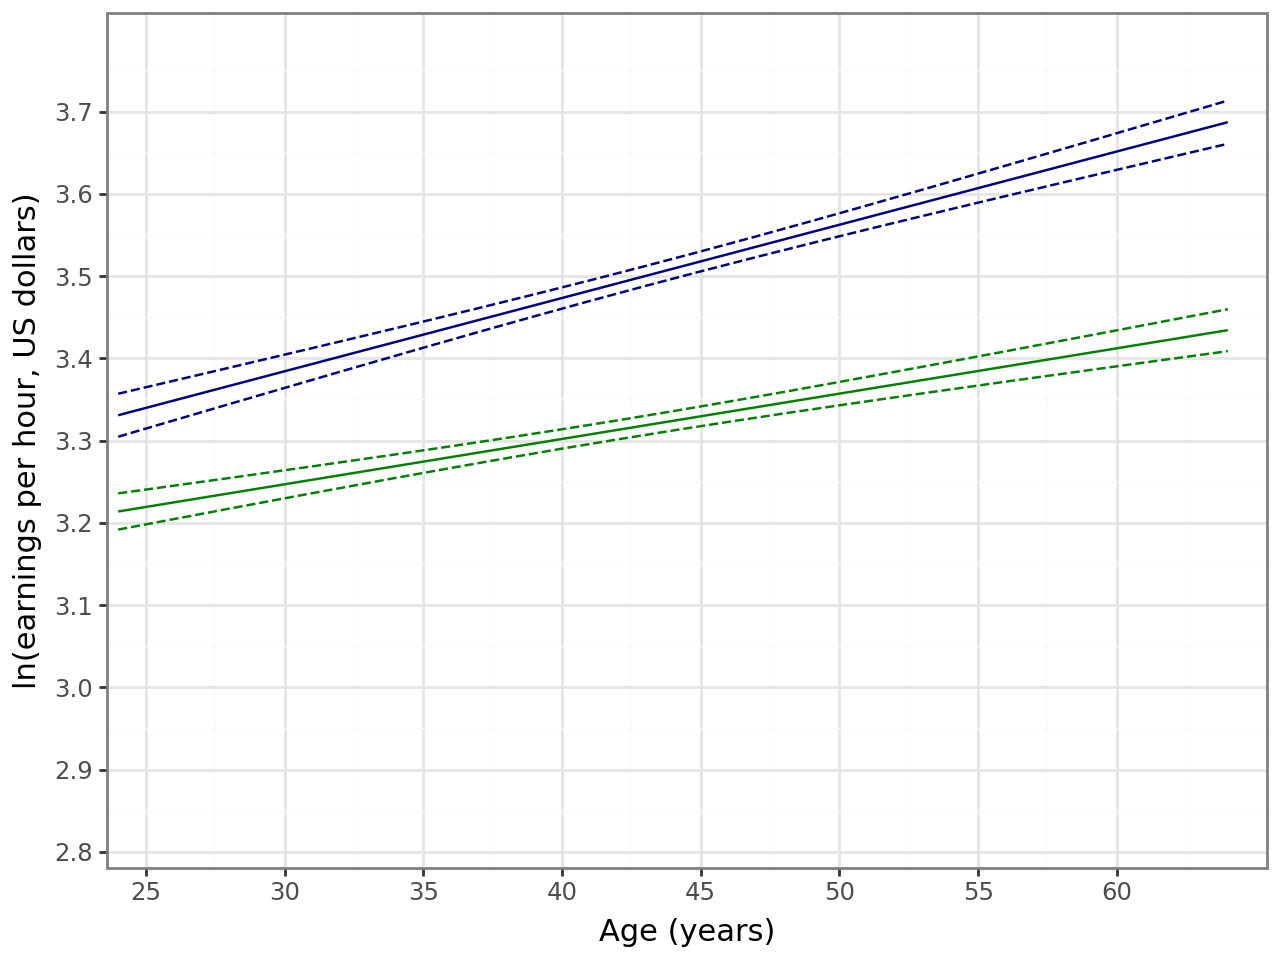

In [25]:
(
    ggplot(data_m, aes(x="age", y="fit"))
    + geom_line(colour="navy")
    + geom_line(data_m, aes(x="age", y="CIup"), colour="navy", linetype="dashed")
    + geom_line(data_m, aes(x="age", y="CIlo"), colour="navy", linetype="dashed")
    + geom_line(data_f, aes(x="age", y="fit"), colour="green")
    + geom_line(data_f, aes(x="age", y="CIup"), colour="green", linetype="dashed")
    + geom_line(data_f, aes(x="age", y="CIlo"), colour="green", linetype="dashed")
    + labs(x="Age (years)", y="ln(earnings per hour, US dollars)")
    + scale_x_continuous(expand=(0.01, 0.01), limits=(24, 65), breaks=np.arange(25, 65, 5))
    + scale_y_continuous(
        expand=(0.01, 0.01), limits=(2.8, 3.8), breaks=np.arange(2.8, 3.8, 0.1)
    )
    + theme_bw()
)


In [26]:
# PREDICTION AND GRAPH POLYNOMIAL
# male
data_m = cps.query("female==0")

pred = reg16.predict(data_m)

pred = reg16.get_prediction(data_m).summary_frame()[["mean", "mean_se"]]
pred.columns = ["fit", "fit_se"]

data_m = data_m.reset_index(drop=True).join(pred)

data_m["CIup"] = data_m["fit"] + 2 * data_m["fit_se"]
data_m["CIlo"] = data_m["fit"] - 2 * data_m["fit_se"]

# female
data_f = cps.query("female==1")

pred = reg16.predict(data_f)

pred = reg16.get_prediction(data_f).summary_frame()[["mean", "mean_se"]]
pred.columns = ["fit", "fit_se"]

data_f = data_f.reset_index(drop=True).join(pred)

data_f["CIup"] = data_f["fit"] + 2 * data_f["fit_se"]
data_f["CIlo"] = data_f["fit"] - 2 * data_f["fit_se"]


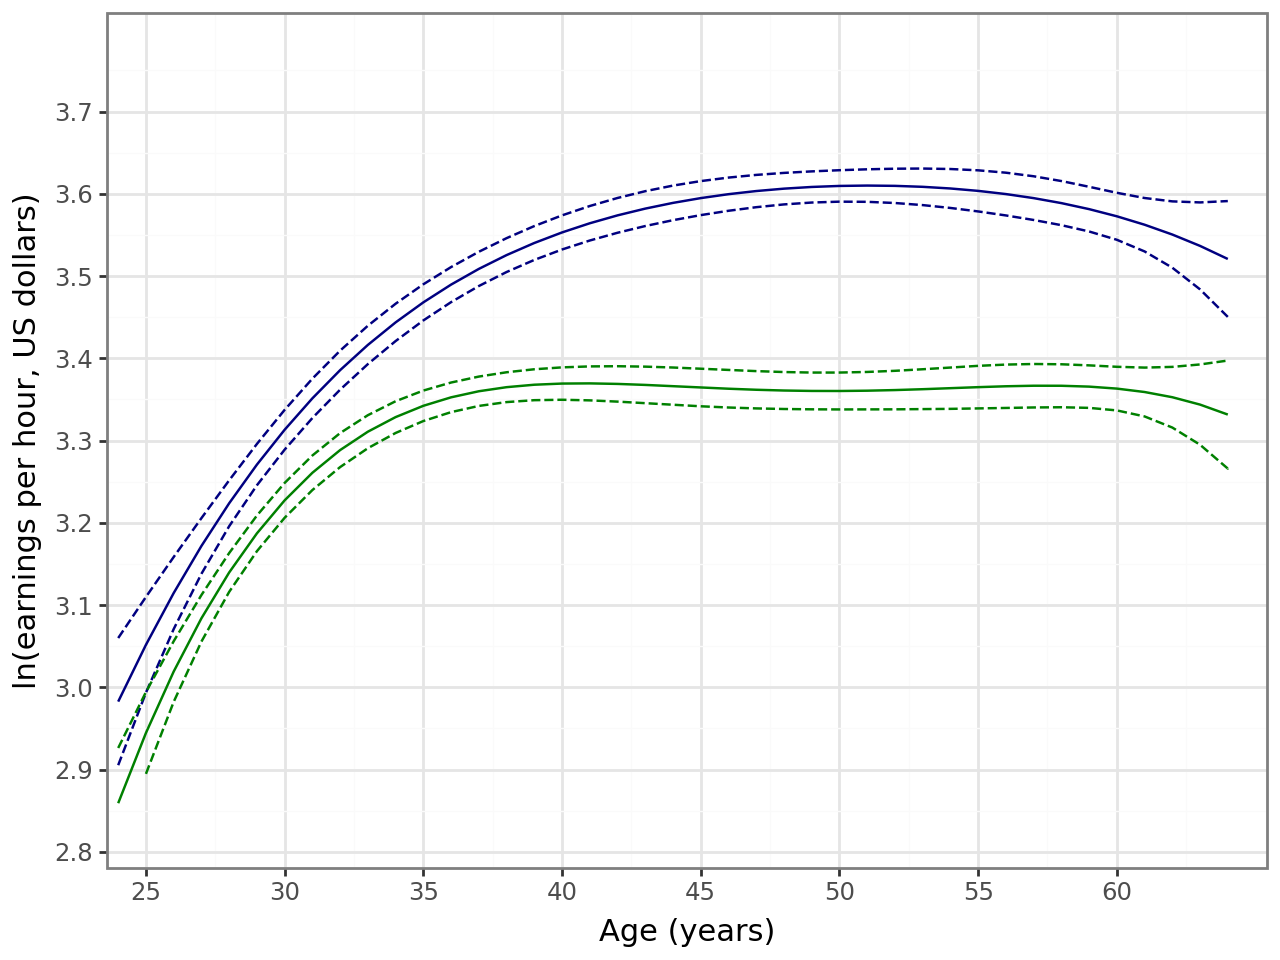

In [27]:
(
    ggplot(data_m, aes(x="age", y="fit"))
    + geom_line(colour="navy")
    + geom_line(data_m, aes(x="age", y="CIup"), colour="navy", linetype="dashed")
    + geom_line(data_m, aes(x="age", y="CIlo"), colour="navy", linetype="dashed")
    + geom_line(data_f, aes(x="age", y="fit"), colour="green")
    + geom_line(data_f, aes(x="age", y="CIup"), colour="green", linetype="dashed")
    + geom_line(data_f, aes(x="age", y="CIlo"), colour="green", linetype="dashed")
    + labs(x="Age (years)", y="ln(earnings per hour, US dollars)")
    + scale_x_continuous(expand=(0.01, 0.01), limits=(24, 65), breaks=np.arange(25, 65, 5))
    + scale_y_continuous(
        expand=(0.01, 0.01), limits=(2.8, 3.8), breaks=np.arange(2.8, 3.8, 0.1)
    )
    + theme_bw()
)


## Part 2
TOWARDS CAUSAL ANALYIS - IS IT DISCRIMINATION?

In [28]:
# FILTER DATA -  SELECTION of the sample we need
cps = cps.query("age>=40 & age<=60")


In [29]:
cps["white"] = (cps["race"] == 1).astype(int)
cps["afram"] = (cps["race"] == 2).astype(int)
cps["asian"] = (cps["race"] == 4).astype(int)
cps["hisp"] = (cps["ethnic"].notna()).astype(int)
cps["othernonw"] = (
    (cps["white"] == 0) & (cps["afram"] == 0) & (cps["asian"] == 0) & (cps["hisp"] == 0)
).astype(int)
cps["nonUSborn"] = (
    (cps["prcitshp"] == "Foreign Born, US Cit By Naturalization")
    | (cps["prcitshp"] == "Foreign Born, Not a US Citizen")
).astype(int)


In [30]:
# Potentially endogeneous demographics
cps["married"] = ((cps["marital"] == 1) | (cps["marital"] == 2)).astype(int)
cps["divorced"] = ((cps["marital"] == 3) & (cps["marital"] == 5)).astype(int)
cps["wirowed"] = (cps["marital"] == 4).astype(int)
cps["nevermar"] = (cps["marital"] == 7).astype(int)

cps["child0"] = (cps["chldpres"] == 0).astype(int)
cps["child1"] = (cps["chldpres"] == 1).astype(int)
cps["child2"] = (cps["chldpres"] == 2).astype(int)
cps["child3"] = (cps["chldpres"] == 3).astype(int)
cps["child4pl"] = (cps["chldpres"] >= 4).astype(int)

# Work-related variables
cps["fedgov"] = (cps["class"] == "Government - Federal").astype(int)
cps["stagov"] = (cps["class"] == "Government - State").astype(int)
cps["locgov"] = (cps["class"] == "Government - Local").astype(int)
cps["nonprof"] = (cps["class"] == "Private, Nonprofit").astype(int)
cps["ind2dig"] = ((pd.Categorical(cps["ind02"]).codes + 1) / 100).astype(int)
cps["occ2dig"] = (cps["occ2012"] / 100).astype(int)
cps["union"] = ((cps["unionmme"] == "Yes") | (cps["unioncov"] == "Yes")).astype(int)


In [31]:
cps["uhourssq"] = np.power(cps["uhours"], 2)
cps["uhourscu"] = np.power(cps["uhours"], 3)
cps["uhoursqu"] = np.power(cps["uhours"], 4)


### Table 10.5 Gender differences in earnings – regression with many covariates on a narrower sample

In [32]:
# Extended regressions
reg1 = smf.ols(formula="lnw ~ female", data=cps).fit(cov_type="HC1")
reg2 = smf.ols(formula="lnw ~ female + age + ed_Profess + ed_Phd", data=cps).fit(
    cov_type="HC1"
)
reg3 = smf.ols(
    formula="lnw ~ female + age + afram + hisp + asian + othernonw + nonUSborn + ed_Profess + ed_Phd + married + divorced+ wirowed + child1 + child2 + child3 +child4pl + C(stfips) + uhours + fedgov + stagov + locgov + nonprof + union + C(ind2dig) + C(occ2dig)",
    data=cps,
).fit(cov_type="HC1")
reg4 = smf.ols(
    formula="lnw ~ female + age + afram + hisp + asian + othernonw + nonUSborn + ed_Profess + ed_Phd + married + divorced+ wirowed + child1 + child2 + child3 +child4pl + C(stfips) + uhours + fedgov + stagov + locgov + nonprof + union + C(ind2dig) + C(occ2dig) + agesq + agecu + agequ + uhoursqu + uhourscu + uhourssq",
    data=cps,
).fit(cov_type="HC1")


In [33]:
stargazer = Stargazer([reg1, reg2, reg3, reg4])
stargazer.covariate_order(["female"])
stargazer.add_line("Age and education", ["", "Yes", "Yes", "Yes"])
stargazer.add_line("Family circumstances", ["", "", "Yes", "Yes"])
stargazer.add_line("Demographic background", ["", "", "Yes", "Yes"])
stargazer.add_line("Job characteristics", ["", "", "Yes", "Yes"])
stargazer.add_line("Age in polynomial", ["", "", "", "Yes"])
stargazer.add_line("Hours in polynomial", ["", "", "", "Yes"])
stargazer
